# DATASET

The dataset is taken from one of the NASA Space Apps Challenge in 2018, “Spot that fire!”, under the section VOLCANOES, ICEBERGS, AND ASTEROIDS (OH MY).
The goal was using the dataset to develop a web-based or phone/tablet-based app that helps engage the public in wildfire prevention and early wildfire detection.
Here in my project I shall use the same dataset to develop a model that can recognize the images with fire.

Data was collected to train a model to distinguish between the images that contain fire (fire images) and regular images (non-fire images), so the whole problem was binary classification.
Data is divided into 2 folders, fire images folder contains 755 outdoor-fire images some of them contains heavy smoke, the other one is non-fire images which contain 244 nature images (eg: forest, tree, grass, river, people, foggy forest, lake, animal, road, and waterfall).
Data is skewed, which means the 2 classes (folders) don't have an equal number of samples, so make sure that you have a validation set with an equally-sized number of images per class (eg: 40 images of both fire and non-fire classes).

# METHODOLOGY
1. Data exploration & visualisation
1. Splitting of data
1. Deep Learning Model to Classify the Images
  * CNN
  * CNN with hyper parameter tuning
  * CNN with transferearning-VGG16

# DATA EXPLORATION & VISULISATION

In [ ]:
# import required basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/My Drive/Imarticus Projects/Capstone Project 2/fire_dataset'

Mounted at /content/drive


In [ ]:
import os
cwd= os.getcwd()
print(cwd)

/content


In [ ]:
df = pd.DataFrame(columns=['path','label']) # creating empty dataframe

# making all fire images as 1
for dirname, _, filenames in os.walk('/content/drive/My Drive/Imarticus Projects/Capstone Project 2/fire_dataset/fire_images'):
  for filename in filenames:
    df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))

# making all non-fire images as 0
for dirname, _, filenames in os.walk('/content/drive/My Drive/Imarticus Projects/Capstone Project 2/fire_dataset/non_fire_images'):
  for filename in filenames:
    df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'non_fire']],columns=['path','label']))
    
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,path,label
0,/content/drive/My Drive/Imarticus Projects/Cap...,fire
1,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
2,/content/drive/My Drive/Imarticus Projects/Cap...,fire
3,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
4,/content/drive/My Drive/Imarticus Projects/Cap...,fire
5,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
6,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
7,/content/drive/My Drive/Imarticus Projects/Cap...,fire
8,/content/drive/My Drive/Imarticus Projects/Cap...,fire
9,/content/drive/My Drive/Imarticus Projects/Cap...,fire


In [ ]:
df.tail()

,path,label
994,/content/drive/My Drive/Imarticus Projects/Cap...,fire
995,/content/drive/My Drive/Imarticus Projects/Cap...,fire
996,/content/drive/My Drive/Imarticus Projects/Cap...,fire
997,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
998,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = px.scatter(data_frame = df,x=df.index,y='label',color='label',title='Distribution of fire and non-fire images along the length of the dataframe')
fig.update_traces(marker_size=2)

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])

fig.add_trace(go.Bar(x =df['label'].value_counts().index,y=df['label'].value_counts().to_numpy(),marker_color=['rosybrown','lightgreen'],showlegend=False),row=1,col=1)

fig.add_trace(go.Pie(values=df['label'].value_counts().to_numpy(),labels=df['label'].value_counts().index,marker=dict(colors=['rosybrown','lightgreen'])),row=1, col=2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

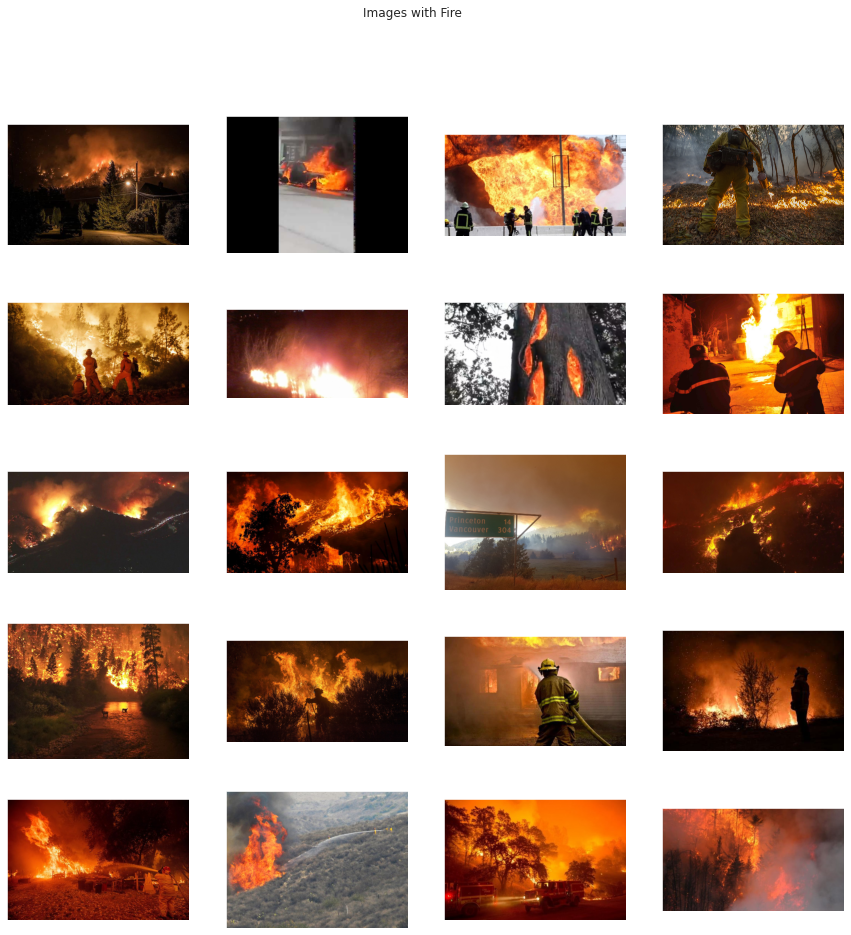

In [ ]:
label = 'fire' #label for images with fire
data = df[df['label'] == label]
sns.set_style('dark')

pics = 20 #set the number of pics
fig,ax = plt.subplots(int(pics//4),4,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//4)*4):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

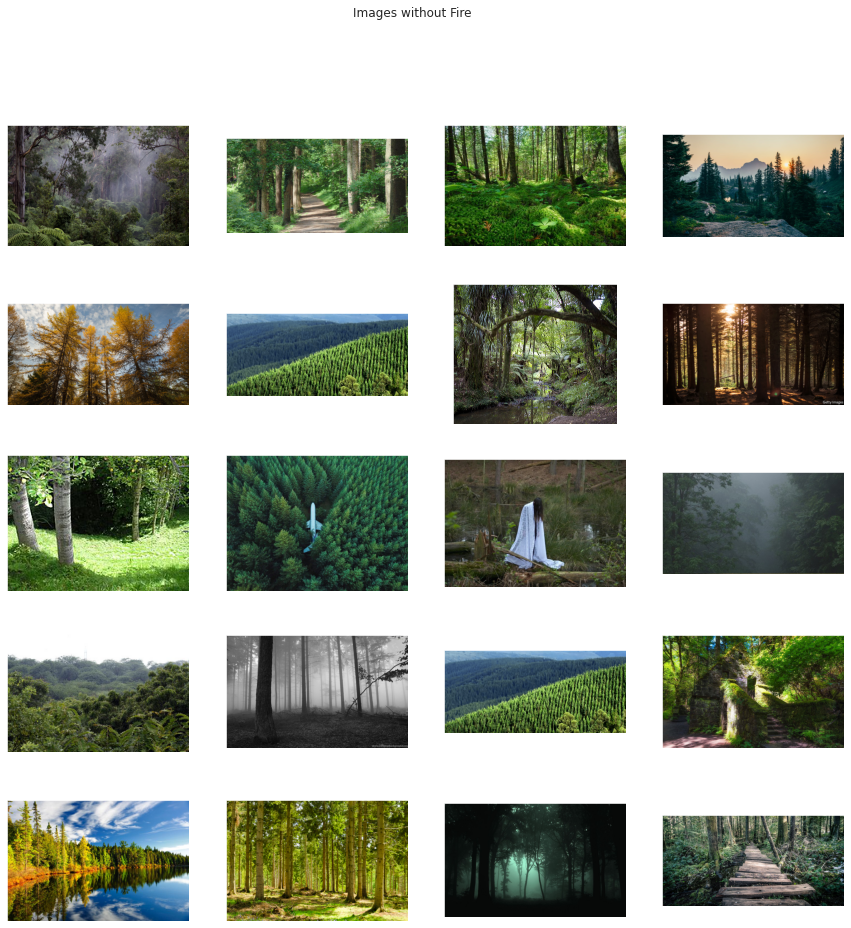

In [ ]:
label = 'non_fire' #label for images without fire
data = df[df['label'] == label]
sns.set_style('dark')

pics = 20 #set the number of pics
fig,ax = plt.subplots(int(pics//4),4,figsize=(15,15))
plt.suptitle('Images without Fire')
ax = ax.ravel()
for i in range((pics//4)*4):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

Visualizing the size of pictures, since sizes vary as seen above.

In [ ]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df.head(5)

,path,label,height,width
0,/content/drive/My Drive/Imarticus Projects/Cap...,fire,1300,1102
1,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire,1200,1800
2,/content/drive/My Drive/Imarticus Projects/Cap...,fire,675,1200
3,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire,555,986
4,/content/drive/My Drive/Imarticus Projects/Cap...,fire,440,660


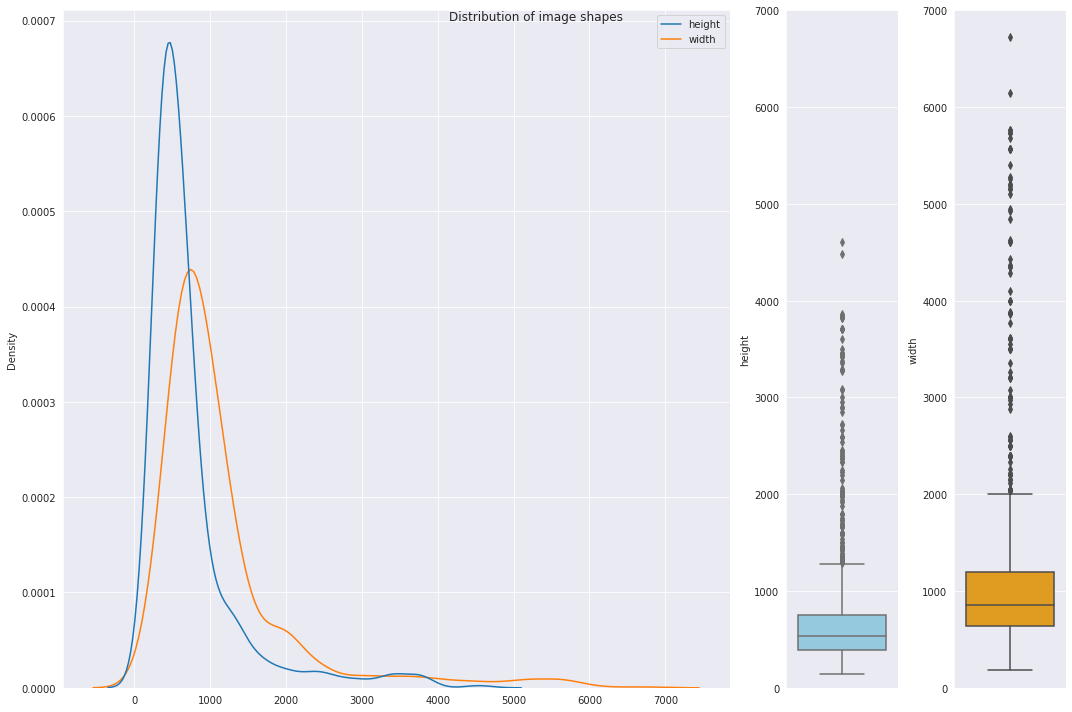

In [ ]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df.drop(columns=['path','label']),ax=ax1,legend=True)
sns.boxplot(data=df,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

Splitting the datatset into training, validation and testing datasets

In [ ]:
df_original = df.copy()
df_original= df_original.drop(['height','width'],axis=1)

In [ ]:
# Split into training, test and validation sets
val_index = int(df_original.shape[0]*0.1)

train_df = df_original.iloc[val_index:]

test_df = df_original.iloc[:val_index]

In [ ]:
# Display the shapes of the sets
train_df.shape, test_df.shape

((900, 2), (99, 2))

In [ ]:
train_df.head()

,path,label
99,/content/drive/My Drive/Imarticus Projects/Cap...,fire
100,/content/drive/My Drive/Imarticus Projects/Cap...,fire
101,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
102,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
103,/content/drive/My Drive/Imarticus Projects/Cap...,fire


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.1,
)
test_generator=ImageDataGenerator()

In [ ]:
train_gen = train_generator.flow_from_dataframe(train_df,x_col='path',y_col='label',images_size=(224,224), batch_size = 32,class_mode='binary',subset='training', target_size=(150,150))
valid_gen = train_generator.flow_from_dataframe(train_df,x_col='path',y_col='label',images_size=(224,224), batch_size = 32,class_mode='binary',subset='validation', target_size=(150,150))
test_gen= test_generator.flow_from_dataframe(test_df,x_col='path',y_col='label',images_size=(224,224), batch_size = 32,class_mode='binary', target_size=(150,150))

Found 810 validated image filenames belonging to 2 classes.
Found 90 validated image filenames belonging to 2 classes.
Found 99 validated image filenames belonging to 2 classes.


In [ ]:
type(train_gen)

keras.preprocessing.image.DataFrameIterator

In [ ]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'fire', 1: 'non_fire'}


In [ ]:
class_indices = {}
for key in valid_gen.class_indices.keys():
    class_indices[valid_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'fire', 1: 'non_fire'}


In [ ]:
class_indices = {}
for key in test_gen.class_indices.keys():
    class_indices[test_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'fire', 1: 'non_fire'}


So, we have 810 images in training set, 90 in validation set and 99 in testing set

# Model building using CNN with transfer learning- VGG16 

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.models import Model
from tensorflow.keras import layers

In [ ]:
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy',Recall(),AUC()] )

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [25]:
# fine-tune the model
history = model.fit(train_gen,epochs=50,validation_data=valid_gen,batch_size=32)

Epoch 1/50
26/26 [==============================] - 258s 10s/step - loss: 0.6658 - accuracy: 0.6494 - recall: 0.1289 - auc: 0.4578 - val_loss: 0.6474 - val_accuracy: 0.7000 - val_recall: 0.0000e+00 - val_auc: 0.5541
Epoch 2/50
26/26 [==============================] - 256s 10s/step - loss: 0.5504 - accuracy: 0.7556 - recall: 0.0412 - auc: 0.6220 - val_loss: 0.5741 - val_accuracy: 0.7000 - val_recall: 0.0000e+00 - val_auc: 0.7375
Epoch 3/50
26/26 [==============================] - 254s 10s/step - loss: 0.4913 - accuracy: 0.7827 - recall: 0.1856 - auc: 0.7197 - val_loss: 0.5397 - val_accuracy: 0.7111 - val_recall: 0.0370 - val_auc: 0.8104
Epoch 4/50
26/26 [==============================] - 257s 10s/step - loss: 0.4613 - accuracy: 0.7802 - recall: 0.1804 - auc: 0.7796 - val_loss: 0.5269 - val_accuracy: 0.7111 - val_recall: 0.0370 - val_auc: 0.8230
Epoch 5/50
26/26 [==============================] - 255s 10s/step - loss: 0.4385 - accuracy: 0.7889 - recall: 0.2216 - auc: 0.8141 - val_loss: 0

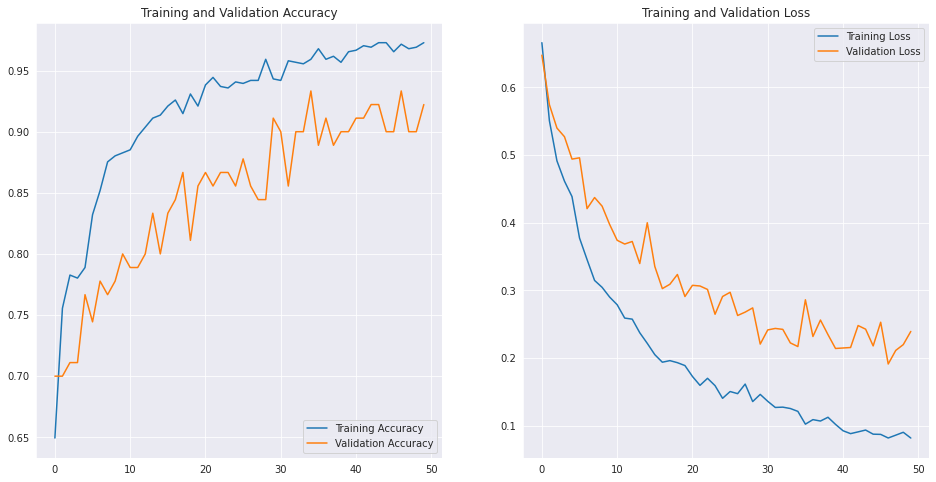

In [26]:
epochs=50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(epochs)

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label='Training Accuracy')
plt.plot(epoch_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
model.evaluate(test_gen)

4/4 [==============================] - 25s 5s/step - loss: 6.3754 - accuracy: 0.8586 - recall: 0.4348 - auc: 0.7749


[6.3754425048828125,
 0.8585858345031738,
 0.43478259444236755,
 0.7748855948448181]